In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from datetime import datetime
import json
from wordcloud import WordCloud

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# Goal : Predict Customer Life-time Value (CLV )for an Auto Insurance Company.
Customer lifetime value is the net profit acquired from a customer throughout a company’s relationship with them.

Knowing each customer’s customer lifetime value helps you know how much you should be spending on customer acquisition. A customer’s acquisition cost could be more than what they spend on their purchase, but if you nurture that relationship, their CLV may grow to an amount that’s well worth the investment. That’s just one of the many reasons why success in the customer-centered economy means understanding the importance of customer lifetime value.

In [2]:
df = pd.read_csv('Marketing-Customer-Value-Analysis.csv')
df.sort_values('Customer Lifetime Value')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6037,UM17151,California,1898.01,No,Basic,Bachelor,2/26/11,Unemployed,M,0,...,91,3,1,Personal Auto,Personal L2,Offer1,Agent,413.61,Two-Door Car,Medsize
2210,CI68869,Arizona,1898.68,No,Basic,College,1/8/11,Unemployed,F,0,...,20,5,1,Personal Auto,Personal L3,Offer3,Agent,702.02,Two-Door Car,Small
2771,XT54610,California,1904.00,No,Basic,Bachelor,1/14/11,Unemployed,F,0,...,7,3,1,Personal Auto,Personal L1,Offer1,Agent,302.40,Four-Door Car,Medsize
7083,EH70612,California,1918.12,No,Basic,College,2/15/11,Unemployed,M,0,...,54,2,1,Personal Auto,Personal L1,Offer1,Branch,439.20,Two-Door Car,Small
6711,XI84293,Oregon,1940.98,No,Basic,High School or Below,2/7/11,Unemployed,M,0,...,40,3,1,Personal Auto,Personal L3,Offer3,Call Center,475.20,Two-Door Car,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,SK66747,Washington,66025.75,No,Basic,Bachelor,2/22/11,Employed,M,33481,...,46,0,2,Personal Auto,Personal L3,Offer1,Agent,1194.89,Luxury SUV,Medsize
7283,KH55886,Oregon,67907.27,No,Premium,Bachelor,2/5/11,Employed,M,78310,...,18,1,2,Personal Auto,Personal L1,Offer1,Agent,151.71,Sports Car,Medsize
6252,BP23267,California,73225.96,No,Extended,Bachelor,2/9/11,Employed,F,39547,...,21,0,2,Personal Auto,Personal L3,Offer1,Branch,969.60,Luxury SUV,Medsize
1974,YC54142,Washington,74228.52,No,Extended,High School or Below,1/26/11,Unemployed,M,0,...,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.40,Luxury Car,Medsize


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.52,6979.54,12887.43,7645.86,2813.69
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


In [5]:
#lets edit date format
df['Effective To Date']= df['Effective To Date'].astype('datetime64[ns]')

There are 9134 Observations of 24  Different Variable. (mix of categorical and continous DataType)

Dependent Variable is Customer Life Time Value as we have to predict the CLV.

Independent Variables are: Customer, StateCustomerLifetimeValue, Response, Coverage, Education, EffectiveToDate, EmploymentStatus, Gender, Income, LocationCode, MaritalStatus, MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPoliciesPolicyType, Policy, RenewOfferType, SalesChannel, TotalClaimAmountVehicleClass, VehicleSize

Continues Independed Variables are : CustomerLifetimeValue, Income,MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPolicies, TotalClaimAmount



In [6]:
df.describe()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [7]:
df.isnull().sum()


Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

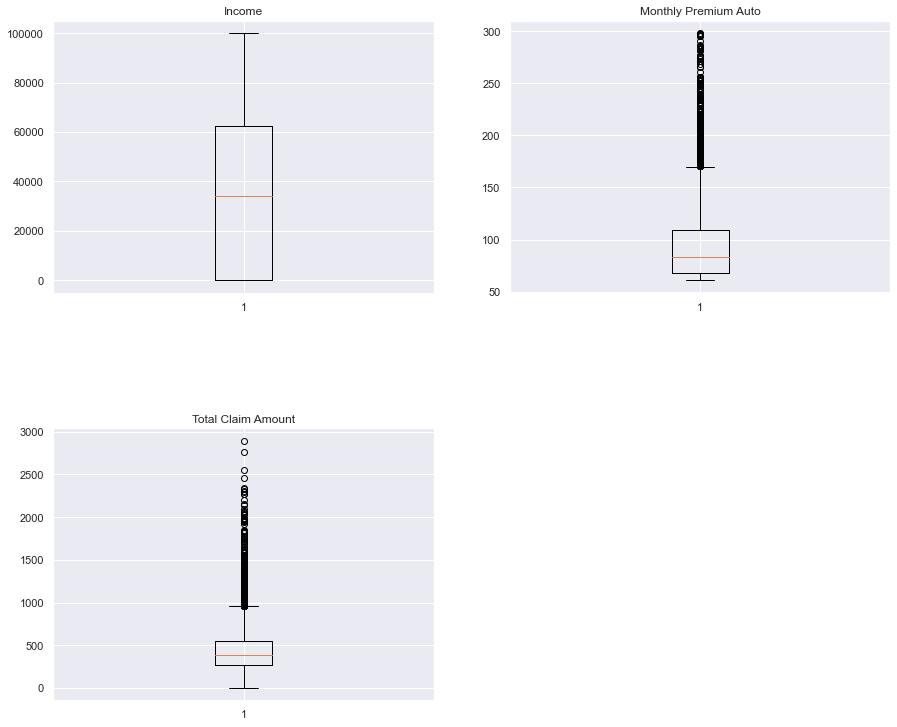

In [8]:
# Looking at outliers of continuos variables

significant_cont = ['Income','Monthly Premium Auto','Total Claim Amount']

sns.set(color_codes=True)
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)

for i in range(len(significant_cont)):
    plt.subplot(3,2,i+1)
    plt.boxplot(df[significant_cont[i]])
    plt.title(significant_cont[i])
    
plt.show()

As it can be seen there are outliers in the total claim amount and also in monthly premium auto , usually we remove the outliers for a better model. Since our dataset is related to insurance industry, outliers can be our potential customer. So, we will check the alternative models that includes outliers and do not include outliers.

There are no outliers in the income.




In [9]:
#checking all categorical variables to determine significant ones.

cat_df = df.select_dtypes(include='object')
cat_df = cat_df.drop(['Customer'], axis = 1)
cols = cat_df.columns
cols

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

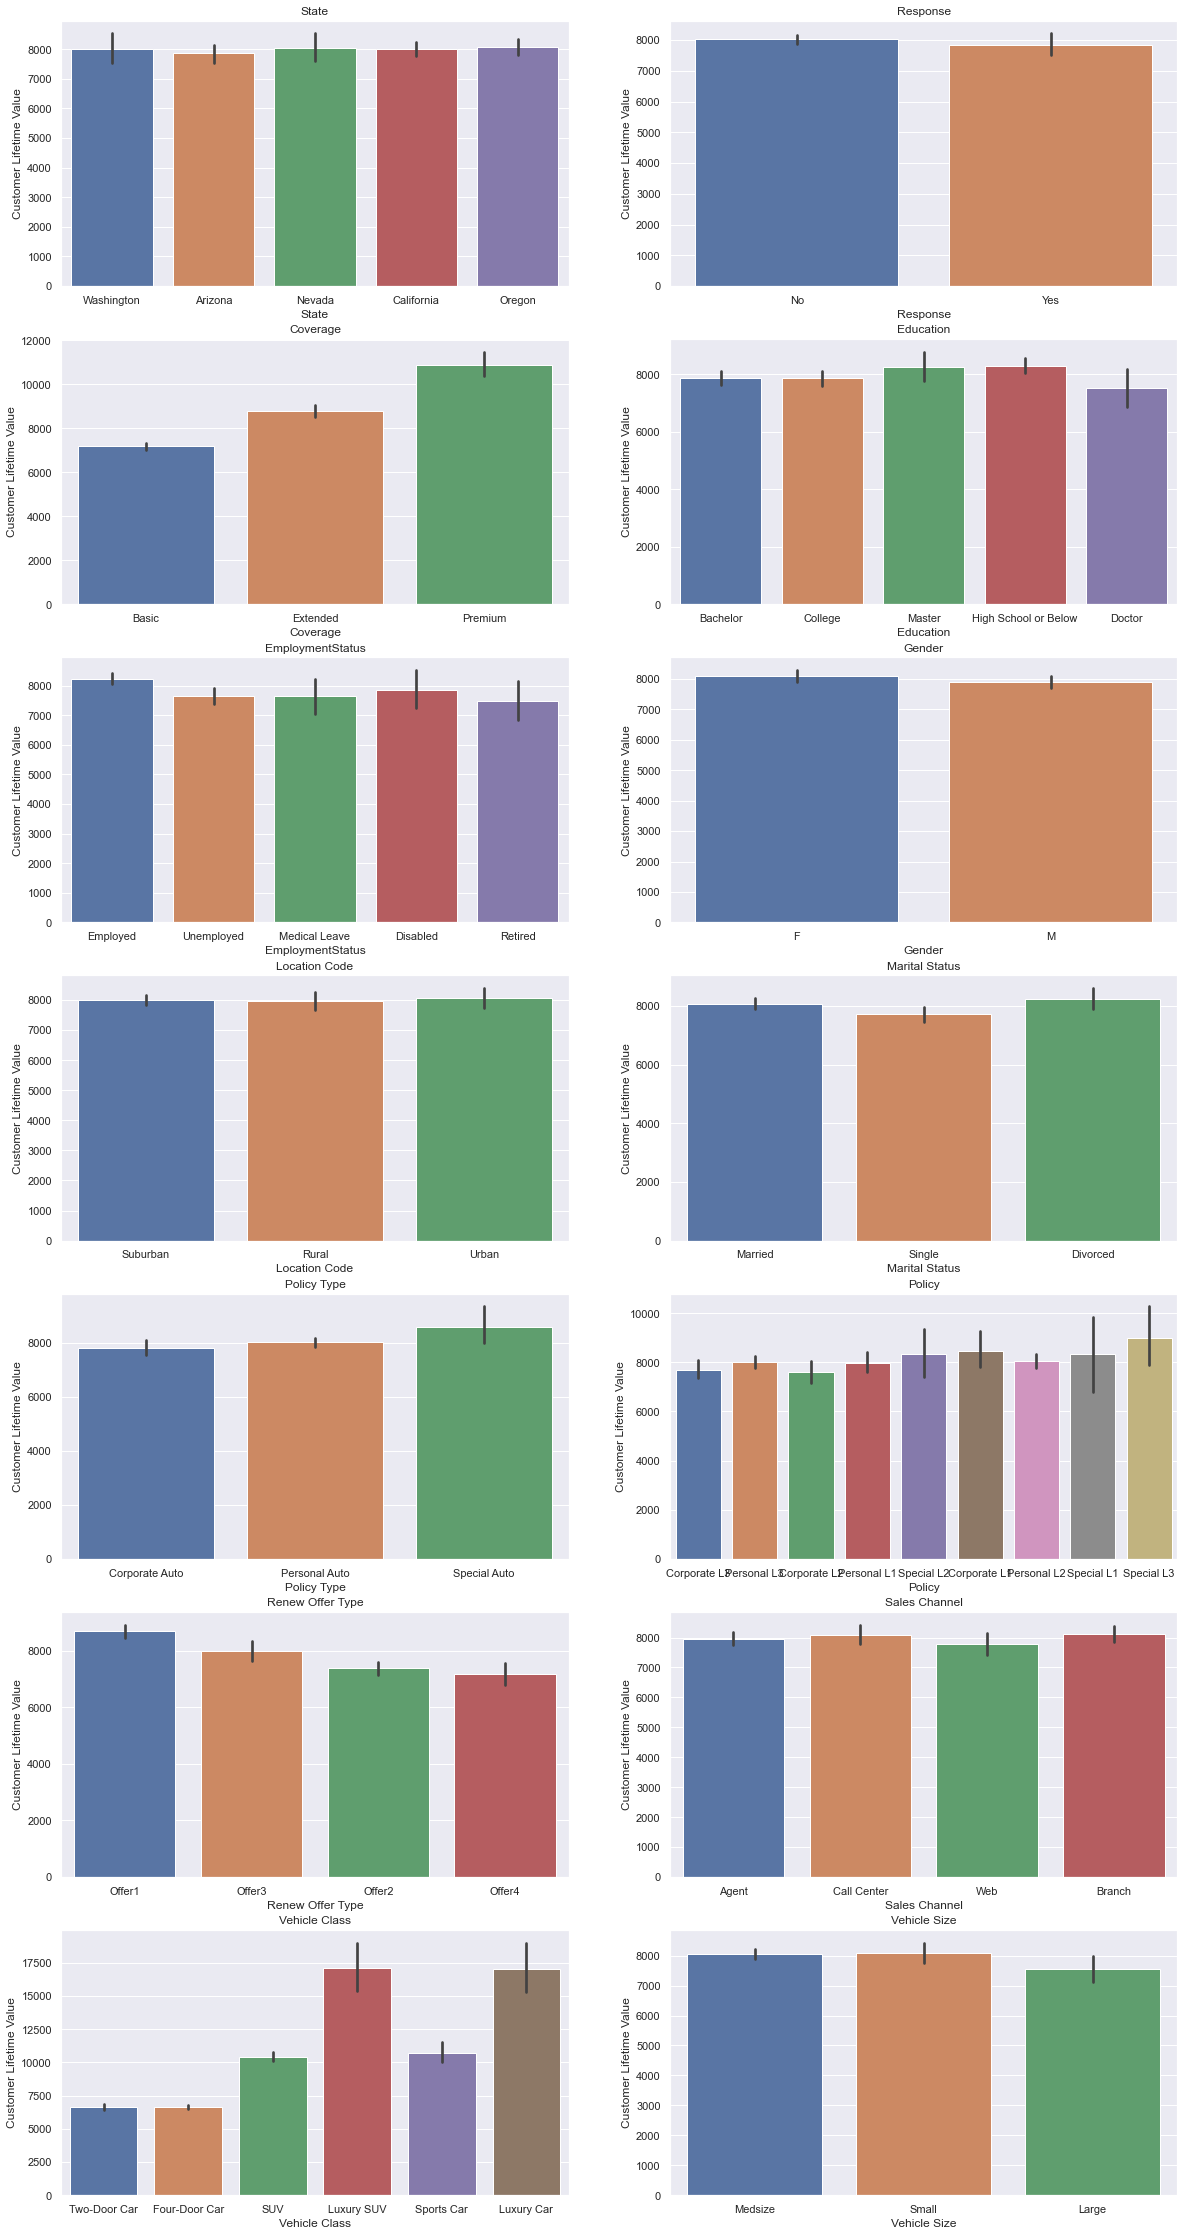

In [10]:
sns.set(color_codes=True)
plt.subplots_adjust(hspace=0.5)
plt.figure(figsize=(20,40))

for i in range(len(cols)):
    plt.subplot(7,2,i+1)
    sns.barplot(x = cols[i],y='Customer Lifetime Value',data = df)
    plt.title(cols[i])
    
plt.show()

Interpretations from graphs:

Customers who have taken only 1 policy have lower customer lifetime value and customers who have taken 3 or greater show a similar trend. So, we can combine all of them into one bin and we can also see that the customers who have taken 2 policies have very high customer lifetime value comparitively.

Customer Lifetime Value is different for different types of coverage.


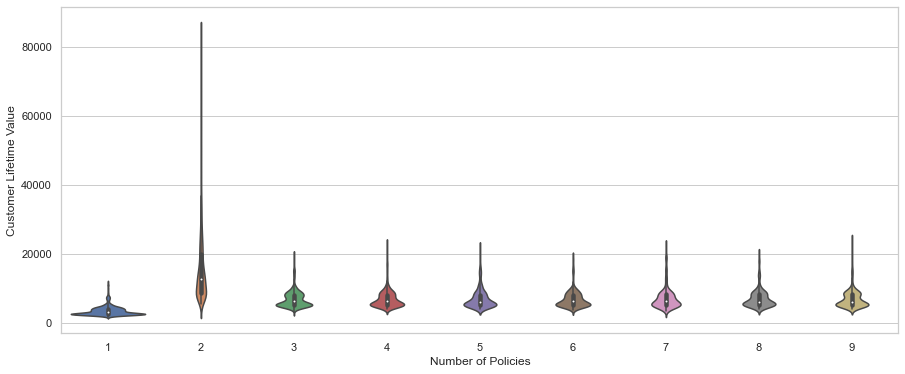

In [11]:

sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="Number of Policies", y="Customer Lifetime Value", data=df)


# Statistical Analysis


Interpretation of graphs gives us some insights but we need to do statistical analysis for statistically significant variables and more clear results.

Considering CLV (Customer Lifetime Value) as the target variable, we will try to understand how each of the independent variables are contributing towards the target variable.

Because our target variable  CLV is a continuous variable, we will have to perform f test/ ANOVA to understand how significant are the independent variables towards target variable.



In [12]:
# Test whether Gender differences are significant or not.
gender = df[['Customer Lifetime Value','Gender']].groupby('Gender')
female = gender['Customer Lifetime Value'].get_group('F')
male = gender['Customer Lifetime Value'].get_group('M')

In [13]:
stats.ttest_ind(female,male)

Ttest_indResult(statistic=1.300686352501256, pvalue=0.19339865630769232)

MEANS ARE SAME FOR GENDER

pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Gender' which means 'Gender' feature is not significant for predicting 'Customer Lifetime Value'

In [14]:
# Test whether Covarage differences are significant or not.
Coverage = df[['Customer Lifetime Value','Coverage']].groupby('Coverage')
Basic = Coverage['Customer Lifetime Value'].get_group('Basic')
Extended = Coverage['Customer Lifetime Value'].get_group('Extended')
Premium =Coverage['Customer Lifetime Value'].get_group('Premium')

In [15]:
stats.f_oneway(Basic,Extended,Premium)

F_onewayResult(statistic=133.67511419504908, pvalue=6.0158970099807e-58)

pvalue > 0.05 implies that there is no significant difference in the mean of target variable for 'Coverage' which means 'Gender' feature is not significant for predicting 'Customer Lifetime Value'

In [16]:
# Test whether Marital Status differences are significant or not.

Marital = df[['Customer Lifetime Value','Marital Status']].groupby('Marital Status')
married = Marital['Customer Lifetime Value'].get_group('Married')
single = Marital['Customer Lifetime Value'].get_group('Single')


In [17]:
stats.ttest_ind(married,single)

Ttest_indResult(statistic=2.1813329263939916, pvalue=0.029188701551162235)

pvalue < 0.05 shows that there is significant difference in the mean of target variable for at least one group of 'Marital Status' that means 'Marital Status' could be a significant feature for predicting 'Customer Lifetime Value'

In [18]:
# Test whether Vehicle Class differences are significant or not.

Vehicleclass = df[['Customer Lifetime Value','Vehicle Class']].groupby('Vehicle Class')
fourdoor = Vehicleclass['Customer Lifetime Value'].get_group('Four-Door Car')
twodoor = Vehicleclass['Customer Lifetime Value'].get_group('Two-Door Car')
suv = Vehicleclass['Customer Lifetime Value'].get_group('SUV')
luxurysuv =Vehicleclass['Customer Lifetime Value'].get_group('Luxury SUV')
luxurycar =Vehicleclass['Customer Lifetime Value'].get_group('Luxury Car')
sportscar =Vehicleclass['Customer Lifetime Value'].get_group('Sports Car')



In [19]:
stats.f_oneway(fourdoor,twodoor,suv,luxurysuv,luxurycar,sportscar)

F_onewayResult(statistic=267.1581168024349, pvalue=2.085525760212929e-267)

In [20]:
# Test whether Renew Offer Type differences are significant or not.

Renewoffer = df[['Customer Lifetime Value','Renew Offer Type']].groupby('Renew Offer Type')
offer1 = Renewoffer['Customer Lifetime Value'].get_group('Offer1')
offer2 = Renewoffer['Customer Lifetime Value'].get_group('Offer2')
offer3 = Renewoffer['Customer Lifetime Value'].get_group('Offer3')
offer4 =Renewoffer['Customer Lifetime Value'].get_group('Offer4')



In [21]:
stats.f_oneway(offer1,offer2,offer3,offer4)

F_onewayResult(statistic=25.83261444494041, pvalue=1.238399930571374e-16)

In [22]:
# Test whether EmploymentStatus differences are significant or not.


EmploymentStatus = df[['Customer Lifetime Value','EmploymentStatus']].groupby('EmploymentStatus')
employed = EmploymentStatus['Customer Lifetime Value'].get_group('Employed')
unemployed = EmploymentStatus['Customer Lifetime Value'].get_group('Unemployed')
medleave = EmploymentStatus['Customer Lifetime Value'].get_group('Medical Leave')
disabled = EmploymentStatus['Customer Lifetime Value'].get_group('Disabled')
retired = EmploymentStatus['Customer Lifetime Value'].get_group('Retired')

In [23]:
stats.f_oneway(employed,unemployed,medleave,disabled,retired)

F_onewayResult(statistic=3.809808710328605, pvalue=0.00425058662383102)

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'EmploymentStatus' which means 'EmploymentStatus' feature can be a significant for predicting 'Customer Lifetime Value'

In [24]:

# Test whether Education differences are significant or not.

Education = df[['Customer Lifetime Value','Education']].groupby('Education')
bachelor = Education['Customer Lifetime Value'].get_group('Bachelor')
college = Education['Customer Lifetime Value'].get_group('College')
highschool = Education['Customer Lifetime Value'].get_group('High School or Below')
master = Education['Customer Lifetime Value'].get_group('Master')
doctor = Education['Customer Lifetime Value'].get_group('Doctor')

In [25]:
stats.f_oneway(bachelor,college,highschool,master,doctor)

F_onewayResult(statistic=2.4228653480521904, pvalue=0.04603615409468821)

pvalue < 0.05 implies that there is significant difference in the mean of target variable for atleast one group of 'Education' which means 'Education' feature can be a significant for predicting 'Customer Lifetime Value'

 ### Furthur Modelling:

#### So we did the EDA and also the Statistical Analysis, so now we can just disregard the features which that are not significant  for our model.

In [26]:
df2 =df.copy()

In [27]:
df2.drop(['State','Coverage','Renew Offer Type','Vehicle Class','Customer','Response','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Effective To Date'],axis=1,inplace = True)

Although months since policy inception, months since last claim, number of open complaints and number of policies are all numerical we will consider them as categorical features while preparing the model because numerical values are not high.

Firstly, according to our EDA, we saw that the number of policies >= 3 have similar trend so we will group all of them as 3

In [28]:
df2['Number of Policies'] = np.where(df2['Number of Policies']>2,3,df2['Number of Policies'])

Lets get dummies of chosen categorical variables

In [29]:
new = pd.get_dummies(df2,columns=['Marital Status','Number of Policies','Education','EmploymentStatus'],drop_first=True)

In [30]:
new

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Marital Status_Married,Marital Status_Single,Number of Policies_2,Number of Policies_3,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,2763.52,56274,69,32,5,0,384.81,1,0,0,0,0,0,0,0,1,0,0,0
1,6979.54,0,94,13,42,0,1131.46,0,1,0,1,0,0,0,0,0,0,0,1
2,12887.43,48767,108,18,38,0,566.47,1,0,1,0,0,0,0,0,1,0,0,0
3,7645.86,0,106,18,65,0,529.88,1,0,0,1,0,0,0,0,0,0,0,1
4,2813.69,43836,73,12,44,0,138.13,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.99,71941,73,18,89,0,198.23,1,0,1,0,0,0,0,0,1,0,0,0
9130,3096.51,21604,79,14,28,0,379.20,0,0,0,0,1,0,0,0,1,0,0,0
9131,8163.89,0,85,9,37,3,790.78,0,1,1,0,0,0,0,0,0,0,0,1
9132,7524.44,21941,96,34,3,0,691.20,1,0,0,1,1,0,0,0,1,0,0,0


## Continuous Variables

Check continious variables and relations of them with categorical variables to see if there is any possibility to create new categorical variables from continuous ones.

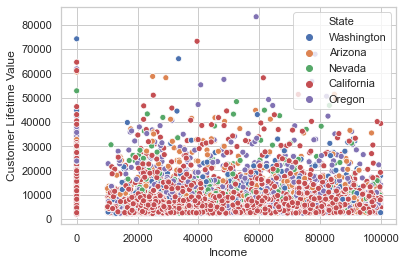

In [31]:

ax = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="State",
                     data=df)


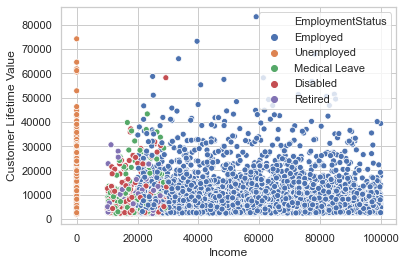

In [32]:

maritalstts = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="EmploymentStatus",
                     data=df)


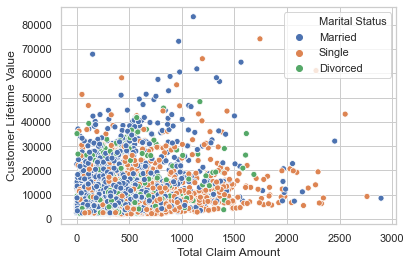

In [33]:

ax = sns.scatterplot(x="Total Claim Amount", y="Customer Lifetime Value", hue="Marital Status",
                     data=df)


## Model 1

There is no obvious pattern to create new categorical variable from continious variables. So far, I have explored the dataset in detail and got familiar with it. Now it is time to create the model and see if I can predict Customer Life Time Value.

In [34]:
import statsmodels.api as sm

y = new['Customer Lifetime Value']
x = new.drop('Customer Lifetime Value',axis=1)


x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.635
Model:                                 OLS   Adj. R-squared:                  0.634
Method:                      Least Squares   F-statistic:                     881.3
Date:                     Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                             14:29:13   Log-Likelihood:                -89055.
No. Observations:                     9134   AIC:                         1.781e+05
Df Residuals:                         9115   BIC:                         1.783e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4542.3757    293.171    -15.494      0.000   -5117.057   -3967.695
Income                            -0.0002      0.003     -0.079      0.937      -0.005       0.005
Monthly Premium Auto              81.0831      1.737     46.668      0.000      77.677      84.489
Months Since Last Claim            6.4917      4.325      1.501      0.133      -1.987      14.971
Months Since Policy Inception      1.5718      1.562      1.006      0.314      -1.490       4.633
Number of Open Complaints       -171.5099     47.808     -3.587      0.000    -265.224     -77.795
Total Claim Amount                -0.1930      0.225     -0.856      0.392      -0.635       0.249
Marital Status_Married            33.9681    127.171      0.267      0.789    -215.315     283.251
Marital Status_Single           -208.7504    148.349     -1.407      0.159    -499.547      82.047
Number of Policies_2             1.22e+04    113.393    107.606      0.000     1.2e+04    1.24e+04
Number of Policies_3            3600.8570    100.695     35.760      0.000    3403.473    3798.241
Education_College                -56.3720    112.894     -0.499      0.618    -277.669     164.925
Education_Doctor                 244.3697    239.216      1.022      0.307    -224.548     713.287
Education_High School or Below   211.2366    114.012      1.853      0.064     -12.253     434.726
Education_Master                 273.2142    173.096      1.578      0.115     -66.093     612.522
EmploymentStatus_Employed        674.0190    232.670      2.897      0.004     217.934    1130.104
EmploymentStatus_Medical Leave   503.8212    287.883      1.750      0.080     -60.495    1068.137
EmploymentStatus_Retired         -49.6053    323.511     -0.153      0.878    -683.759     584.549
EmploymentStatus_Unemployed       45.6754    234.824      0.195      0.846    -414.632     505.983
==============================================================================
Omnibus:                     7121.966   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239144.603
Skew:                           3.468   Prob(JB):                         0.00
Kurtosis:                      27.089   Cond. No.                     5.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Then I will split my dataset into training and testing data which means I will select 25% of the data randomly and separate it from the training data. (test_size shows the percentage of the test data – 25%) (If you don’t specify the random_state in your code, then every time you run (execute) your code, a new random value is generated and training and test datasets would have different values each time.)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x_train.shape[0]))
print('Test Data Count: {}'.format(x_test.shape[0]))

x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.638
Model:                                 OLS   Adj. R-squared:                  0.637
Method:                      Least Squares   F-statistic:                     670.1
Date:                     Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                             14:29:13   Log-Likelihood:                -66724.
No. Observations:                     6850   AIC:                         1.335e+05
Df Residuals:                         6831   BIC:                         1.336e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -4444.2189    336.302    -13.215      0.000   -5103.476   -3784.961
Income                            -0.0005      0.003     -0.178      0.858      -0.006       0.005
Monthly Premium Auto              82.0071      2.007     40.867      0.000      78.073      85.941
Months Since Last Claim           10.4677      4.924      2.126      0.034       0.815      20.121
Months Since Policy Inception      0.7055      1.787      0.395      0.693      -2.797       4.208
Number of Open Complaints       -140.7293     54.949     -2.561      0.010    -248.447     -33.011
Total Claim Amount                -0.1445      0.261     -0.554      0.579      -0.656       0.366
Marital Status_Married          -129.8938    144.796     -0.897      0.370    -413.739     153.951
Marital Status_Single           -352.2025    168.453     -2.091      0.037    -682.422     -21.983
Number of Policies_2            1.209e+04    129.979     92.984      0.000    1.18e+04    1.23e+04
Number of Policies_3            3567.1377    115.382     30.916      0.000    3340.953    3793.322
Education_College               -174.4652    129.164     -1.351      0.177    -427.668      78.737
Education_Doctor                 168.9490    277.539      0.609      0.543    -375.113     713.011
Education_High School or Below   131.1008    130.374      1.006      0.315    -124.472     386.674
Education_Master                 209.1596    198.976      1.051      0.293    -180.895     599.214
EmploymentStatus_Employed        730.4381    265.926      2.747      0.006     209.139    1251.737
EmploymentStatus_Medical Leave   500.6632    327.850      1.527      0.127    -142.025    1143.352
EmploymentStatus_Retired        -187.8947    369.425     -0.509      0.611    -912.083     536.294
EmploymentStatus_Unemployed      -29.0894    267.846     -0.109      0.914    -554.151     495.973
==============================================================================
Omnibus:                     5524.817   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213180.203
Skew:                           3.592   Prob(JB):                         0.00
Kurtosis:                      29.369   Cond. No.                     5.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

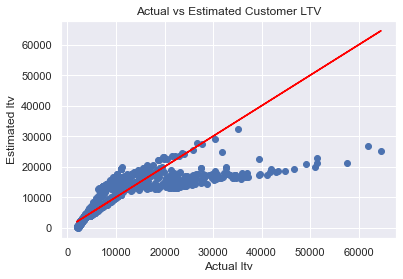

In [36]:
# Model graph to see predictions


x_test = sm.add_constant(x_test)

y_preds = results.predict(x_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV")
plt.show()

In [37]:
#lets see their errors

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 2131.2150468419864
Mean Sq. Error (MSE)          : 18223563.696062855
Root Mean Sq. Error (RMSE)     : 4268.906615992303
Mean Abs. Perc. Error (MAPE) : 23.902650971762842


In [38]:
all_score = []

all_score.append((results.rsquared,
                  mean_absolute_error(y_test, y_preds),
                 mse(y_test, y_preds),rmse(y_test, y_preds),
                 np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

## not a good prediction

## Model 2

In [39]:

#duplicate the original data and get the log version of it to be able to reach higher R2(with outliers)
df3 = new.copy()

df3['Monthly Premium Auto'] = np.log(df2['Monthly Premium Auto'])
df3['Total Claim Amount'] = np.log(df2['Total Claim Amount'])
y = np.log(df3['Customer Lifetime Value'])

import statsmodels.api as sm


x1 =  df3.drop('Customer Lifetime Value',axis=1)

In [40]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x1_train.shape[0]))
print('Test Data Count: {}'.format(x1_test.shape[0]))

x1_train = sm.add_constant(x1_train)
results_log = sm.OLS(y_train, x1_train).fit()
results_log.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.903
Model:                                 OLS   Adj. R-squared:                  0.902
Method:                      Least Squares   F-statistic:                     3514.
Date:                     Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                             14:29:13   Log-Likelihood:                 1181.3
No. Observations:                     6850   AIC:                            -2325.
Df Residuals:                         6831   BIC:                            -2195.
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.6661      0.039     93.123      0.000       3.589       3.743
Income                          1.915e-07   1.43e-07      1.344      0.179   -8.78e-08    4.71e-07
Monthly Premium Auto               0.9866      0.009    112.080      0.000       0.969       1.004
Months Since Last Claim            0.0006      0.000      2.363      0.018    9.82e-05       0.001
Months Since Policy Inception     -0.0001   8.85e-05     -1.172      0.241      -0.000    6.98e-05
Number of Open Complaints         -0.0200      0.003     -7.350      0.000      -0.025      -0.015
Total Claim Amount                -0.0005      0.003     -0.144      0.885      -0.007       0.006
Marital Status_Married             0.0031      0.007      0.438      0.662      -0.011       0.017
Marital Status_Single             -0.0346      0.008     -4.172      0.000      -0.051      -0.018
Number of Policies_2               1.3976      0.006    217.141      0.000       1.385       1.410
Number of Policies_3               0.6925      0.006    121.203      0.000       0.681       0.704
Education_College                 -0.0061      0.006     -0.957      0.339      -0.019       0.006
Education_Doctor                   0.0182      0.014      1.322      0.186      -0.009       0.045
Education_High School or Below     0.0110      0.006      1.712      0.087      -0.002       0.024
Education_Master                   0.0256      0.010      2.599      0.009       0.006       0.045
EmploymentStatus_Employed          0.0671      0.013      5.101      0.000       0.041       0.093
EmploymentStatus_Medical Leave     0.0281      0.016      1.733      0.083      -0.004       0.060
EmploymentStatus_Retired          -0.0067      0.018     -0.367      0.713      -0.043       0.029
EmploymentStatus_Unemployed       -0.0157      0.013     -1.184      0.236      -0.042       0.010
==============================================================================
Omnibus:                     2395.926   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10542.490
Skew:                           1.663   Prob(JB):                         0.00
Kurtosis:                       8.086   Cond. No.                     7.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

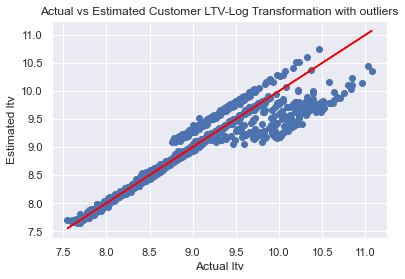

In [41]:
# Model graph to see predictions


x1_test = sm.add_constant(x1_test)

y_preds = results_log.predict(x1_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Log Transformation with outliers")
plt.show()

In [42]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.10430066026920666
Mean Sq. Error (MSE)          : 0.04292592471988527
Root Mean Sq. Error (RMSE)     : 0.20718572518367492
Mean Abs. Perc. Error (MAPE) : 1.098604973932757


In [43]:
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)



In [44]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(exp_ytest, exp_ypreds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(exp_ytest, exp_ypreds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(exp_ytest, exp_ypreds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

Mean Absolute Error (MAE)        : 1561.2804657012803
Mean Sq. Error (MSE)          : 16187540.3921036
Root Mean Sq. Error (RMSE)     : 4023.3742545410314
Mean Abs. Perc. Error (MAPE) : 9.977385043369086


In [45]:
all_score.append((results.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypreds),
                 mse(exp_ytest, exp_ypreds),rmse(exp_ytest, exp_ypreds),
                 np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

## Model 3

In [46]:
#duplicate the original data and winsorize the data at %5
df4 = new.copy()

df4['Monthly Premium Auto'] = winsorize(df4['Monthly Premium Auto'],(0, 0.05))
df4['Total Claim Amount'] = winsorize(df4['Total Claim Amount'],(0, 0.05))


y = df4['Customer Lifetime Value']
x3 =  df4.drop('Customer Lifetime Value',axis=1)


In [47]:
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x3_train.shape[0]))
print('Test Data Count: {}'.format(x3_test.shape[0]))


x3_train = sm.add_constant(x3_train)
results_wins = sm.OLS(y_train, x3_train).fit()
results_wins.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.627
Model:                                 OLS   Adj. R-squared:                  0.626
Method:                      Least Squares   F-statistic:                     638.1
Date:                     Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                             14:29:14   Log-Likelihood:                -66830.
No. Observations:                     6850   AIC:                         1.337e+05
Df Residuals:                         6831   BIC:                         1.338e+05
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5812.5694    355.415    -16.354      0.000   -6509.293   -5115.846
Income                            -0.0006      0.003     -0.216      0.829      -0.006       0.005
Monthly Premium Auto              95.5500      2.365     40.406      0.000      90.914     100.186
Months Since Last Claim           12.0310      5.002      2.405      0.016       2.226      21.836
Months Since Policy Inception      1.3065      1.815      0.720      0.472      -2.251       4.864
Number of Open Complaints       -139.2090     55.808     -2.494      0.013    -248.609     -29.809
Total Claim Amount                 0.3758      0.301      1.248      0.212      -0.215       0.966
Marital Status_Married          -118.1893    147.042     -0.804      0.422    -406.437     170.058
Marital Status_Single           -334.1336    170.963     -1.954      0.051    -669.274       1.007
Number of Policies_2            1.207e+04    132.006     91.406      0.000    1.18e+04    1.23e+04
Number of Policies_3            3544.6533    117.176     30.251      0.000    3314.953    3774.354
Education_College               -178.5960    131.191     -1.361      0.173    -435.772      78.580
Education_Doctor                 195.1480    281.879      0.692      0.489    -357.424     747.719
Education_High School or Below   110.1581    132.440      0.832      0.406    -149.465     369.781
Education_Master                 220.5500    202.130      1.091      0.275    -175.688     616.788
EmploymentStatus_Employed        824.8042    270.027      3.055      0.002     295.468    1354.141
EmploymentStatus_Medical Leave   471.9979    332.960      1.418      0.156    -180.707    1124.703
EmploymentStatus_Retired        -114.2044    375.266     -0.304      0.761    -849.843     621.434
EmploymentStatus_Unemployed     -102.5569    271.918     -0.377      0.706    -635.601     430.487
==============================================================================
Omnibus:                     5687.641   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249694.883
Skew:                           3.711   Prob(JB):                         0.00
Kurtosis:                      31.632   Cond. No.                     5.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

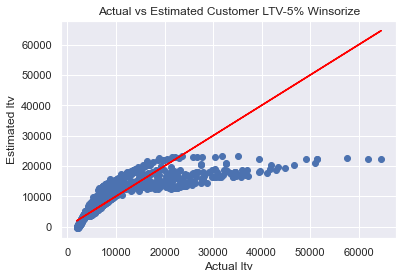

In [48]:
# Model graph to see predictions


x3_test = sm.add_constant(x3_test)

y_preds = results_wins.predict(x3_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-5% Winsorize")
plt.show()

In [49]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 2291.9617957183
Mean Sq. Error (MSE)          : 18235432.183725
Root Mean Sq. Error (RMSE)     : 4270.296498338845
Mean Abs. Perc. Error (MAPE) : 27.32021322257444


In [50]:
all_score.append((results_wins.rsquared,
                  mean_absolute_error(y_test, y_preds),
                 mse(y_test, y_preds),rmse(y_test, y_preds),
                 np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

## Model 4

In [51]:
#duplicate the original data and take log of the data without outlier

df5 = df4.copy()


df5['Monthly Premium Auto'] = np.log(df5['Monthly Premium Auto'])
df5['Total Claim Amount'] = np.log(df5['Total Claim Amount'])


y = np.log(df5['Customer Lifetime Value'])
x7 =df5.drop('Customer Lifetime Value',axis=1)


In [52]:
x7_train, x7_test, y_train, y_test = train_test_split(x7, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x7_train.shape[0]))
print('Test Data Count: {}'.format(x7_test.shape[0]))


x7_train = sm.add_constant(x7_train)
results_logwins = sm.OLS(y_train, x7_train).fit()
results_logwins.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.897
Model:                                 OLS   Adj. R-squared:                  0.897
Method:                      Least Squares   F-statistic:                     3298.
Date:                     Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                             14:29:14   Log-Likelihood:                 985.64
No. Observations:                     6850   AIC:                            -1933.
Df Residuals:                         6831   BIC:                            -1803.
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.3055      0.044     75.476      0.000       3.220       3.391
Income                          1.432e-07   1.47e-07      0.977      0.329   -1.44e-07    4.31e-07
Monthly Premium Auto               1.0645      0.010    108.646      0.000       1.045       1.084
Months Since Last Claim            0.0007      0.000      2.621      0.009       0.000       0.001
Months Since Policy Inception  -6.239e-05    9.1e-05     -0.685      0.493      -0.000       0.000
Number of Open Complaints         -0.0200      0.003     -7.131      0.000      -0.025      -0.014
Total Claim Amount                 0.0029      0.003      0.885      0.376      -0.004       0.009
Marital Status_Married             0.0039      0.007      0.530      0.596      -0.011       0.018
Marital Status_Single             -0.0314      0.009     -3.676      0.000      -0.048      -0.015
Number of Policies_2               1.3962      0.007    210.820      0.000       1.383       1.409
Number of Policies_3               0.6909      0.006    117.523      0.000       0.679       0.702
Education_College                 -0.0065      0.007     -0.993      0.321      -0.019       0.006
Education_Doctor                   0.0179      0.014      1.268      0.205      -0.010       0.046
Education_High School or Below     0.0106      0.007      1.593      0.111      -0.002       0.024
Education_Master                   0.0259      0.010      2.554      0.011       0.006       0.046
EmploymentStatus_Employed          0.0717      0.014      5.293      0.000       0.045       0.098
EmploymentStatus_Medical Leave     0.0248      0.017      1.484      0.138      -0.008       0.058
EmploymentStatus_Retired          -0.0045      0.019     -0.239      0.811      -0.041       0.032
EmploymentStatus_Unemployed       -0.0199      0.014     -1.462      0.144      -0.047       0.007
==============================================================================
Omnibus:                     2245.668   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8872.706
Skew:                           1.589   Prob(JB):                         0.00
Kurtosis:                       7.581   Cond. No.                     8.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

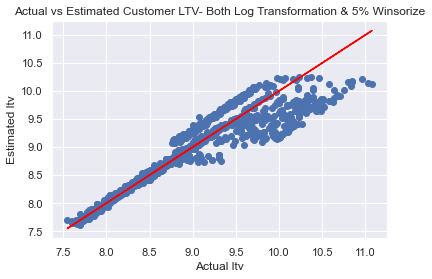

In [53]:
# Model graph to see predictions


x7_test = sm.add_constant(x7_test)

y_preds = results_logwins.predict(x7_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV- Both Log Transformation & 5% Winsorize")
plt.show()

In [54]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.11486223109889106
Mean Sq. Error (MSE)          : 0.04523451555851886
Root Mean Sq. Error (RMSE)     : 0.21268407452961507
Mean Abs. Perc. Error (MAPE) : 1.215496446031992


In [55]:
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)

all_score.append((results_logwins.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypreds),
                 mse(exp_ytest, exp_ypreds),rmse(exp_ytest, exp_ypreds),
                 np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

## Model 5

In [57]:
#the best model is the one with log transformation and outliers included

#Let's use polynomial features to see if we can do better


from sklearn.preprocessing import PolynomialFeatures


y = np.log(df3['Customer Lifetime Value'])
x5 =df3.drop('Customer Lifetime Value',axis=1)


pol = PolynomialFeatures()


array = pol.fit_transform(x5)

df_pol = pd.DataFrame(array)
df_pol.columns = pol.get_feature_names(x5.columns)


In [58]:
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(df_pol_train.shape[0]))
print('Test Data Count: {}'.format(df_pol_test.shape[0]))

df_pol_train = sm.add_constant(df_pol_train)
results_pol = sm.OLS(y_train, df_pol_train).fit()
results_pol.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.907
Model:                                 OLS   Adj. R-squared:                  0.905
Method:                      Least Squares   F-statistic:                     401.6
Date:                     Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                             14:29:15   Log-Likelihood:                 1334.6
No. Observations:                     6850   AIC:                            -2343.
Df Residuals:                         6687   BIC:                            -1230.
Df Model:                              162                                         
Covariance Type:                 nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
1                                                                 3.1958      0.484      6.597      0.000       2.246       4.146
Income                                                         2.809e-06   3.22e-06      0.872      0.383    -3.5e-06    9.12e-06
Monthly Premium Auto                                              1.1777      0.199      5.921      0.000       0.788       1.568
Months Since Last Claim                                          -0.0075      0.004     -1.901      0.057      -0.015       0.000
Months Since Policy Inception                                     0.0002      0.001      0.118      0.906      -0.003       0.003
Number of Open Complaints                                        -0.0671      0.048     -1.407      0.160      -0.161       0.026
Total Claim Amount                                               -0.0369      0.057     -0.646      0.518      -0.149       0.075
Marital Status_Married                                            0.0599      0.057      1.046      0.296      -0.052       0.172
Marital Status_Single                                             0.0396      0.069      0.577      0.564      -0.095       0.174
Number of Policies_2                                              0.7724      0.051     15.170      0.000       0.673       0.872
Number of Policies_3                                              0.3337      0.046      7.259      0.000       0.244       0.424
Education_College                                                 0.0008      0.052      0.015      0.988      -0.100       0.102
Education_Doctor                                                 -0.0299      0.113     -0.264      0.792      -0.252       0.192
Education_High School or Below                                    0.0147      0.052      0.282      0.778      -0.087       0.117
Education_Master                                                  0.0575      0.078      0.735      0.462      -0.096       0.211
EmploymentStatus_Employed                                         0.1034      0.102      1.016      0.310      -0.096       0.303
EmploymentStatus_Medical Leave                                    0.4374      0.141      3.098      0.002       0.161       0.714
EmploymentStatus_Retired                                          0.2364      0.174      1.357      0.175      -0.105       0.578
EmploymentStatus_Unemployed                                       0.1389      0.103      1.345      0.179      -0.063       0.341
Income^2                                                       6.902e-12   6.92e-12      0.997      0.319   -6.67e-12    2.05e-11
Income Monthly Premium Auto           

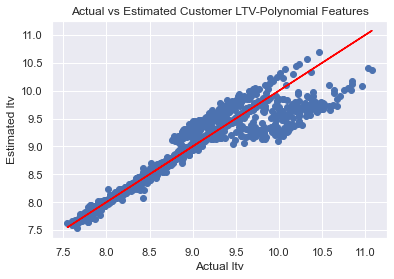

In [59]:
# Model graph to see predictions


df_pol_test = sm.add_constant(df_pol_test)

y_preds = results_pol.predict(df_pol_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features")
plt.show()

In [ ]:
# Model graph to see predictions


df_pol_test = sm.add_constant(df_pol_test)

y_preds = results_pol.predict(df_pol_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features")
plt.show()

In [60]:
print("Mean Absolute Error (MAE)     : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)    : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE)  : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)     : 0.10925543312693253
Mean Sq. Error (MSE)          : 0.043296056671998415
Root Mean Sq. Error (RMSE)    : 0.20807704503860683
Mean Abs. Perc. Error (MAPE)  : 1.1590682155234573


In [61]:
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)

all_score.append((results_pol.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypreds),
                 mse(exp_ytest, exp_ypreds),rmse(exp_ytest, exp_ypreds),
                 np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

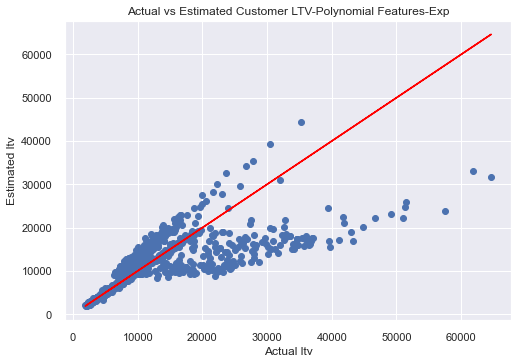

In [79]:
# Model graph to see exponential version of predictions


df_pol_test = sm.add_constant(df_pol_test)

y_preds = np.exp(results_pol.predict(df_pol_test))
sns.set(color_codes=True)
plt.scatter(exp_ytest, y_preds)
plt.plot(exp_ytest, exp_ytest, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features-Exp")
plt.show()


Actual scores and predicted scores have good linearity but after some point we see that linearity is not good enough. In the graph, it is seen that customer life time value prediction is better with the values lower than 10.000.Lets check if there is any improvement on mean sq error term when we predict customer LTV lower than 10.000.

In [88]:
mse( y_test[y_test<10],y_preds[y_test<10])

0.02101381067982307

We see that Mean Sq. Error decreased from 0.04 to 0.02 which is almost half of the initial error.

## Model 6

We see some improvements when we get polynomial feautures into the scene. However, there are some insignificant features in the model that p-values are more than 0.05. Thats why we will build a new model by removing insignificant features towards target variable.

In [63]:
significant_features = list(results_pol.pvalues[results_pol.pvalues <= 0.05].index)

In [64]:


df_sig_train, df_sig_test, y_train, y_test = train_test_split(df_pol[significant_features], y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(df_sig_train.shape[0]))
print('Test Data Count: {}'.format(df_sig_test.shape[0]))

df_sig_train = sm.add_constant(df_sig_train)
results_sig = sm.OLS(y_train, df_sig_train).fit()
results_sig.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.904
Model:                                 OLS   Adj. R-squared:                  0.904
Method:                      Least Squares   F-statistic:                     2005.
Date:                     Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                             14:29:16   Log-Likelihood:                 1231.6
No. Observations:                     6850   AIC:                            -2397.
Df Residuals:                         6817   BIC:                            -2172.
Df Model:                               32                                         
Covariance Type:                 nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
1                                                                 3.6855      0.038     97.870      0.000       3.612       3.759
Monthly Premium Auto                                              0.9923      0.008    117.515      0.000       0.976       1.009
Number of Policies_2                                              0.6689      0.011     59.008      0.000       0.647       0.691
Number of Policies_3                                              0.3463      0.003    121.774      0.000       0.341       0.352
EmploymentStatus_Medical Leave                                    0.2901      0.099      2.923      0.003       0.096       0.485
Income Months Since Last Claim                                 1.632e-08   6.03e-09      2.708      0.007    4.51e-09    2.81e-08
Monthly Premium Auto EmploymentStatus_Medical Leave              -0.1150      0.044     -2.607      0.009      -0.201      -0.029
Monthly Premium Auto EmploymentStatus_Unemployed                 -0.0479      0.014     -3.524      0.000      -0.075      -0.021
Months Since Last Claim^2                                      4.942e-06   1.17e-05      0.424      0.672   -1.79e-05    2.78e-05
Months Since Last Claim Marital Status_Married                   -0.0009      0.000     -1.921      0.055      -0.002    1.84e-05
Months Since Last Claim Number of Policies_2                      0.0021      0.001      3.793      0.000       0.001       0.003
Months Since Policy Inception Marital Status_Married          -7.106e-05      0.000     -0.599      0.549      -0.000       0.000
Months Since Policy Inception EmploymentStatus_Medical Leave     -0.0011      0.000     -2.801      0.005      -0.002      -0.000
Months Since Policy Inception EmploymentStatus_Unemployed     -7.183e-05      0.000     -0.409      0.682      -0.000       0.000
Number of Open Complaints^2                                      -0.0091      0.001     -8.258      0.000      -0.011      -0.007
Number of Open Complaints EmploymentStatus_Employed               0.0194      0.005      3.934      0.000       0.010       0.029
Total Claim Amount Marital Status_Married                         0.0049      0.002      2.229      0.026       0.001       0.009
Total Claim Amount Marital Status_Single                         -0.0029      0.003     -0.850      0.396      -0.010       0.004
Total Claim Amount EmploymentStatus_Unemployed                    0.0280      0.010      2.810      0.005       0.008       0.048
Marital Status_Married Marital Status_Single                  -9.241e-15    1.1e-14     -0.840      0.401   -3.08e-14    1.23e-14
Marital Status_Married Number of Polic

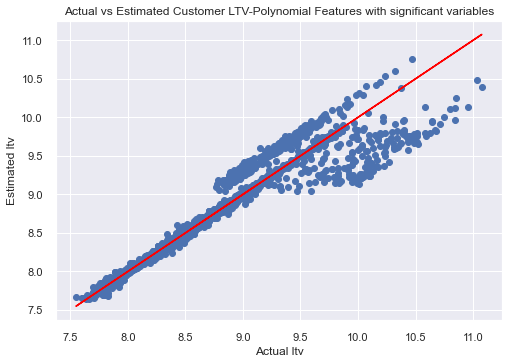

In [83]:
# Model graph to see predictions


df_sig_test = sm.add_constant(df_sig_test)

y_preds = results_sig.predict(df_sig_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv" )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features with significant variables")
plt.show()

In the graph, we see that model predicts lower values betten than higher ones.

In [66]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 0.10655644031918496
Mean Sq. Error (MSE)          : 0.04300404932396458
Root Mean Sq. Error (RMSE)     : 0.2073741770905061
Mean Abs. Perc. Error (MAPE) : 1.1258593193374753


In [67]:
exp_ypreds = np.exp(y_preds)
exp_ytest = np.exp(y_test)

all_score.append((results_sig.rsquared,
                  mean_absolute_error(exp_ytest, exp_ypreds),
                 mse(exp_ytest, exp_ypreds),rmse(exp_ytest, exp_ypreds),
                 np.mean(np.abs((exp_ytest - exp_ypreds) / exp_ytest)) * 100))

In [68]:
df_allscore = pd.DataFrame(all_score)

In [69]:
df_allscore.index = ['Standard','Log with outliers','Without Outliers','Log without outliers',
                       'Polynomial Features',
                       'Polynomial with significant features']

df_allscore.columns = ['R2', 'MAE', 'MSE','RMSE','MAPE']


df_allscore

,R2,MAE,MSE,RMSE,MAPE
Standard,0.64,2131.22,18223563.70,4268.91,23.90
Log with outliers,0.64,1561.28,16187540.39,4023.37,9.98
Without Outliers,0.63,2291.96,18235432.18,4270.30,27.32
Log without outliers,0.90,1653.35,16408887.08,4050.79,11.00
Polynomial Features,0.91,1575.53,16216668.90,4026.99,10.47
Polynomial with significant features,0.90,1569.71,16147609.05,4018.41,10.19


## Let's check the test /train data prediction if there is underfitting/overfitting problem

In [70]:
lrm = LinearRegression()
lrm.fit(df_pol_train, y_train)

y_train_predict = lrm.predict(df_pol_train)
y_test_predict = lrm.predict(df_pol_test)

print("Train observation number  : {}".format(df_pol_train.shape[0]))
print("Test observation number   : {}".format(df_pol_test.shape[0]), "\n")

print("Train R-Square  : {}".format(lrm.score(df_pol_train, y_train)))
print("-----Test Scores---")
print("Test R-Square   : {}".format(lrm.score(df_pol_test, y_test)))
print("Mean_absolute_error (MAE)             : {}".format(mean_absolute_error(y_test, y_test_predict)))
print("Mean squared error (MSE)              : {}".format(mse(y_test, y_test_predict)))
print("Root mean squared error(RMSE)         : {}".format(rmse(y_test, y_test_predict)))
print("Mean absolute percentage error (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100))

Train observation number  : 6850
Test observation number   : 2284 

Train R-Square  : 0.9068016477332239
-----Test Scores---
Test R-Square   : 0.8989427108826769
Mean_absolute_error (MAE)             : 0.10925546994711251
Mean squared error (MSE)              : 0.04329605502174296
Root mean squared error(RMSE)         : 0.20807704107311542
Mean absolute percentage error (MAPE) : 1.1590686427730317


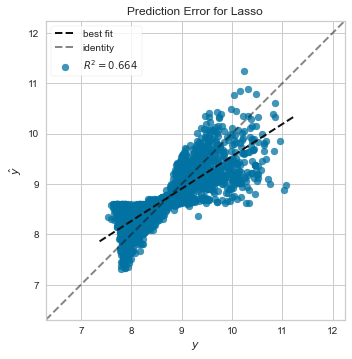

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


# Create the train and test data
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.25, random_state = 450)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(df_pol_train, y_train)  # Fit the training data to the visualizer
visualizer.score(df_pol_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

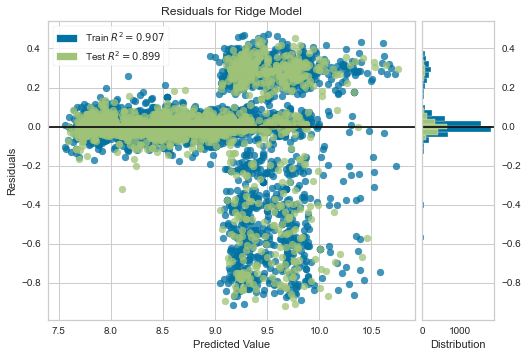

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


# Instantiate the linear model and visualizer
Model = Ridge()
visualizer_residual = ResidualsPlot(Model)

visualizer_residual.fit(df_pol_train, y_train)  # Fit the training data to the visualizer
visualizer_residual.score(df_pol_test, y_test)  # Evaluate the model on the test data
visualizer_residual.show()                 # Finaliz

## Conclusion

We have created six different models to reach the best model with highest R-square and lower error terms.

In the light of comparison table, we could choose to go for the 5th model which have both log transformation and polynomial features. We see that R square is 0.91 means that 91% of the variance can be explained, which is really high. 

It seems like I predict values really good! Actual scores and predicted scores have good linearity but after some point we see that linearity is not good enough. In the graph, it is seen that customer life time value prediction is better with the values lower than 10.000. If we predict customer LTV lower than 10.000, we see that Mean Sq. Error decreased from 0.04 to 0.02 which is almost half of the initial error.

We do not see overfitting problem with the model but still I have checked Lasso and Ridge models to see if there is any change on the model.

From marketing perspective, we have a better opinion which customer have higher predicted life time value. With that information it is easier to lead marketing activities into more profitable scale.

